### Computer libraries in PyTorch (TorchVision)

### Libraries

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and dataloading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Datasets` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create a Python iterable over a dataset

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


### Getting dataset

**find datasets in torchvision.datatasets**


In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the dta?
    target_transform=None # how do we wnat to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
# See the first trainig example
image, label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### Check shape of input images and labels

In [ ]:
print(f"Image shape: {image.shape}")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


## Visual our data

Text(0.5, 1.0, '9')

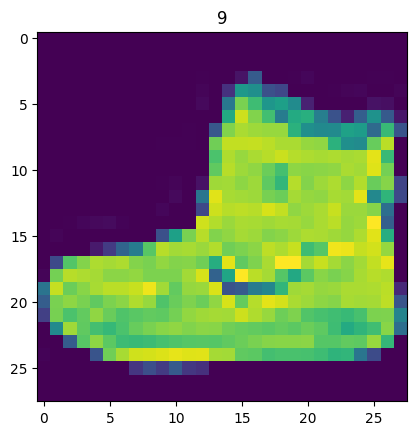

In [ ]:
image , label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

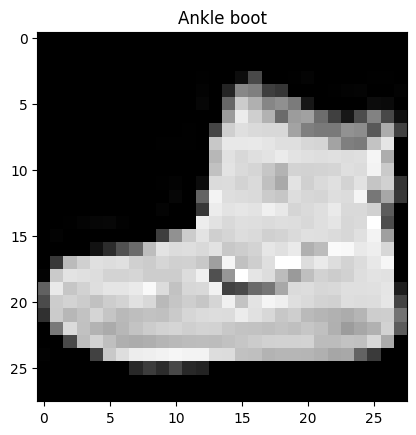

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

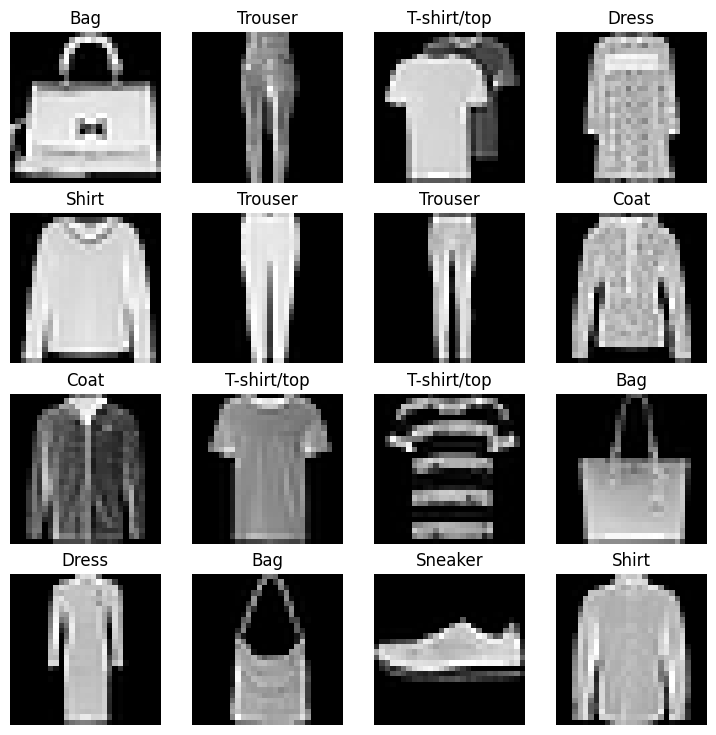

In [ ]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4 , 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image , label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader

Right now, our data is in the form of PyTorch datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computaionally efficient, as in, your computing hardware may not be able to look (store in momery) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.


In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e1b2d69f520>,
 <torch.utils.data.dataloader.DataLoader at 0x7e1b2d69f3a0>)

In [ ]:
# Let's check out what we've created
print(f"Dataloader: {train_dataloader , test_dataloader}")
print(f"Lenght/ No. of batches of/in Trian_dataloader: {len(train_dataloader)} of batch size {BATCH_SIZE}")
print(f"Lenght/ No. of batches of/in Test_dataloader: {len(test_dataloader)} of batch size {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7e1b2d69f520>, <torch.utils.data.dataloader.DataLoader object at 0x7e1b2d69f3a0>)
Lenght/ No. of batches of/in Trian_dataloader: 1875 of batch size 32
Lenght/ No. of batches of/in Test_dataloader: 313 of batch size 32


In [ ]:
# Check out whar's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9 , labe1 size: torch.Size([])


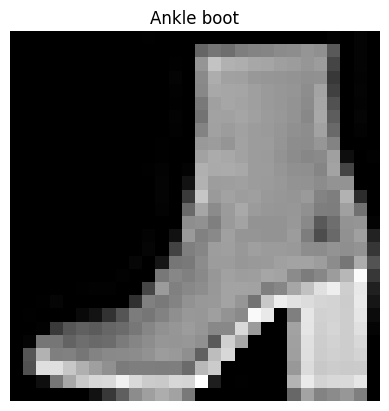

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {label} , labe1 size: {label.shape}")

## Model 0 : Build a base line model

When starting to build a series of machine learinig=ng modelling experiments, it's best practise to start with a baseline model.

A basline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words : start simply add complexity when necessary.

In [ ]:
# Creating a flatten layer
flatten_layer = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_layer(x) # perform forward pass

# print what's happening
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_Stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_Stack(x)


In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=8, # how many units in the hidden layer
    output_shape=len(class_names) # one for ech class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_Stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x), model_0(dummy_x).shape

(tensor([[ 0.2306, -0.4151, -0.3436, -0.3989, -0.2214,  0.0647,  0.3306,  0.0571,
           0.0713,  0.2716]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [ ]:
import requests
from pathlib import Path

# Download helper functions from learn python repo (if it is not already downloaded)
if Path("helper_function.py").is_file():
  print("helper_function.py alredy exist, skipping download")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

In [ ]:
from helper_function import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

###  Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll want to track are:
1. Model's performance (loss and accuracy values etc.)
2. How fast it runs.

In [ ]:
from timeit import default_timer as timer

def print_time(start: float,
               end: float,
               device: torch.device = None):
  time = end - start
  print(f"Time on device {device}: {time:.3f} seconds.")

In [ ]:
start = timer()
# some code
end = timer()
print_time(start,end,device="cpu")

Time on device cpu: 0.000 seconds.


### Creating a training loop and trainig a model on batches of data

1. loop through epochs
2. loop through training batches, perform training steps , ca;culate the train loss **per batch.**
3. loop through testing batches, perform testing steps, calculate the test loss **per batch.**
4. print out what's happening
5. Time it all(for fun).

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----------")
  ### Training
  train_loss , train_acc = 0 , 0
  # Add a loop to loop through training batches
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    acc = accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Print what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train_dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  ### Testing
  test_loss , test_acc = 0 , 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,
                      y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\n Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_cpu = timer()
Train_time_model_0  = print_time(start=train_time_start_on_cpu,
                                 end=train_time_end_cpu,
                                 device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.9294 | Train acc: 68.7867 | Test loss: 0.6792 | test acc: 75.9285
Epoch: 1 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5987 | Train acc: 79.3600 | Test loss: 0.5761 | test acc: 79.8722
Epoch: 2 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5304 | Train acc: 81.7667 | Test loss: 0.5387 | test acc: 81.1901
Time on device cpu: 26.529 seconds.


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = None):
  loss, acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X , y = X.to(device) , y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name :": model.__class__.__name__,
          "model_loss :": loss.item(),
          "model_acc :": acc}


In [ ]:
# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = "cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name :': 'FashionMNISTModelV0',
 'model_loss :': 0.5387320518493652,
 'model_acc :': 81.19009584664536}

### Setup device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model_1 : Building a better model with non_linearity

In [ ]:
# create a modelwith mom-linear and linear layer
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_Stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_Stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=8,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

### Functionizing training and evaluation/testing loops

Let's create a function for:
* Training loop : `train_step()`
* Testing loop : `teat_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Perform training with model trying to learn on data_loader"""

  ### Training
  model.train()

  train_loss , train_acc = 0 , 0

  # Add a loop to loop through training batches
  for batch , (X,y) in enumerate(data_loader):
    X , y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    acc = accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Print what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss and acc by length of train_dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"\n Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")


In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Perform testing with model trying to learn on data_loader"""

  ### testing
  model.eval()

  test_loss , test_acc = 0 , 0

  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test , y_test = X_test.to(device) , y_test.to(device)

      test_pred = model(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,
                      y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\n Test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

In [ ]:
# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number of epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----------")
  ### Training
  train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

  ###testing
  test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)

# Calculate training time
train_time_end_on_gpu = timer()
Train_time_model_1  = print_time(start=train_time_start_on_gpu,
                                 end=train_time_end_on_gpu,
                                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 1.4694 | Train acc: 47.2750

 Test loss: 1.1511 | test acc: 57.9373
Epoch: 1 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 1.0694 | Train acc: 60.8883

 Test loss: 1.0312 | test acc: 62.0907
Epoch: 2 
-----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.9585 | Train acc: 65.6083

 Test loss: 0.8545 | test acc: 70.1178
Time on device cuda: 32.657 seconds.


In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name :': 'FashionMNISTModelV1',
 'model_loss :': 0.8544713854789734,
 'model_acc :': 70.11781150159744}

## New Model : Building a Convolutional Neural Network (CNN)

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # input to this layer depends on the ouput of flatten layer which is 490 in this case
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
len(class_names)

10

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Trying network with rand tensor

In [ ]:
rand_tensor = torch.randn(size=(1, 28, 28))
rand_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass tensor through model
model_2(rand_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

# Pass test image through Conv layer
conv_output = conv_layer(test_image)
conv_output , conv_output.shape

(tensor([[[ 1.2491,  1.3681,  0.8879,  ...,  0.2521,  0.3688, -0.4466],
          [ 0.5575,  1.4840, -0.0041,  ...,  0.8155,  0.3699, -0.3972],
          [ 0.9968,  0.3105,  0.9558,  ...,  0.2253, -0.3298,  0.3230],
          ...,
          [-0.0179,  0.2425, -0.2988,  ..., -0.7840, -0.6324, -0.1340],
          [-0.3250, -0.0942, -0.1337,  ...,  0.3672, -0.2358, -0.5696],
          [ 0.4450, -0.6241,  0.0609,  ...,  0.4869, -0.3892,  0.7199]],
 
         [[-0.0263,  0.6020, -0.6337,  ..., -0.5868,  0.5730, -0.7234],
          [ 0.3157, -0.1949,  0.0571,  ...,  1.6490, -1.1559, -0.3519],
          [-0.5775,  0.3644, -0.0371,  ...,  0.2890, -0.7965, -0.3402],
          ...,
          [ 0.0244, -0.1093, -0.5496,  ...,  0.0306, -0.6942,  0.0127],
          [ 0.3830, -0.5415, -0.1162,  ...,  0.3347, -0.6244,  0.8263],
          [-0.0792, -0.7507,  0.3534,  ...,  0.3483, -0.4739,  0.2477]],
 
         [[ 0.2776, -0.9564, -0.8502,  ...,  0.3389, -1.4244,  0.0901],
          [-0.7879,  0.2326,

## Stepping through `nn.maxPool2d()`

In [ ]:
max_pool = nn.MaxPool2d(kernel_size=2)

#Pass through conv
conv = conv_layer(test_image)
print(conv.shape)

# Then pass through max pool
conv_plus_maxpool = max_pool(conv)
print(conv_plus_maxpool.shape)

torch.Size([64, 64, 64])
torch.Size([64, 32, 32])


In [ ]:
## Setup loss function/eval metrics/optimizer

from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.005)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

# Calculate training time
train_time_end_model_2 = timer()
Train_time_model_2  = print_time(start=train_time_start_model_2,
                                 end=train_time_end_model_2,
                                 device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 1.3354 | Train acc: 51.6267

 Test loss: 0.7062 | test acc: 74.1713
Epoch: 1
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.6620 | Train acc: 76.0117

 Test loss: 0.6428 | test acc: 75.4093
Epoch: 2
------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5682 | Train acc: 79.4067

 Test loss: 0.5480 | test acc: 80.1518
Time on device cuda: 36.123 seconds.


In [ ]:
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name :': 'FashionMNISTModelV2',
 'model_loss :': 0.5479692220687866,
 'model_acc :': 80.15175718849841}

### Compare model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name :,model_loss :,model_acc :
0,FashionMNISTModelV0,0.538732,81.190096
1,FashionMNISTModelV1,0.854471,70.117812
2,FashionMNISTModelV2,0.547969,80.151757


In [ ]:
# Add training time to compare results
compare_results["Training_time:"] = [Train_time_model_0,
                                    Train_time_model_1,
                                    Train_time_model_2]

compare_results

,model_name :,model_loss :,model_acc :,Training_time:
0,FashionMNISTModelV0,0.538732,81.190096,None
1,FashionMNISTModelV1,0.854471,70.117812,None
2,FashionMNISTModelV2,0.547969,80.151757,None


Text(0, 0.5, 'Model')

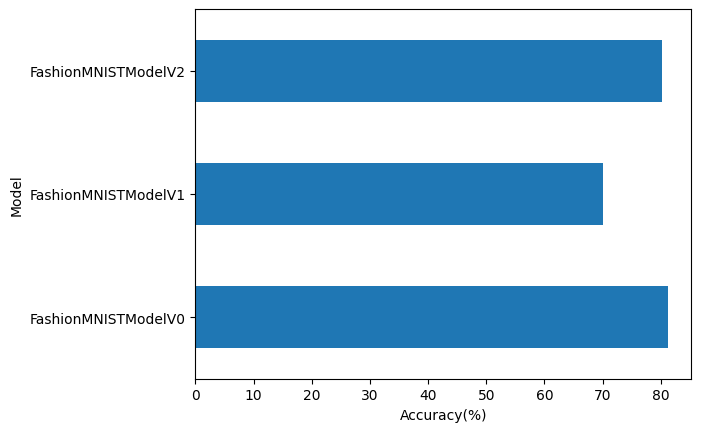

In [ ]:
# Visualize our model results
compare_results.set_index("model_name :")["model_acc :"].plot(kind="barh")
plt.xlabel("Accuracy(%)")
plt.ylabel("Model")

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     decice: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (ass a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model output raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred prob off the gpu for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

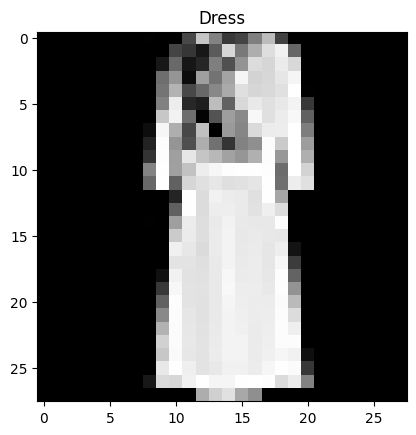

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[8.8578e-02, 1.9649e-02, 2.3787e-04, 8.8924e-01, 4.2520e-04, 7.3316e-08,
         8.5631e-04, 4.8194e-04, 3.3665e-04, 1.9887e-04],
        [4.3665e-06, 3.3368e-08, 2.0254e-06, 8.2386e-07, 1.5864e-06, 1.9376e-02,
         7.0233e-06, 2.0332e-02, 2.8743e-03, 9.5740e-01]])

In [ ]:
# Convert prediction to probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 9, 5, 7, 0, 1, 0, 4, 4])

In [ ]:
test_labels

[3, 9, 8, 7, 0, 1, 0, 4, 2]

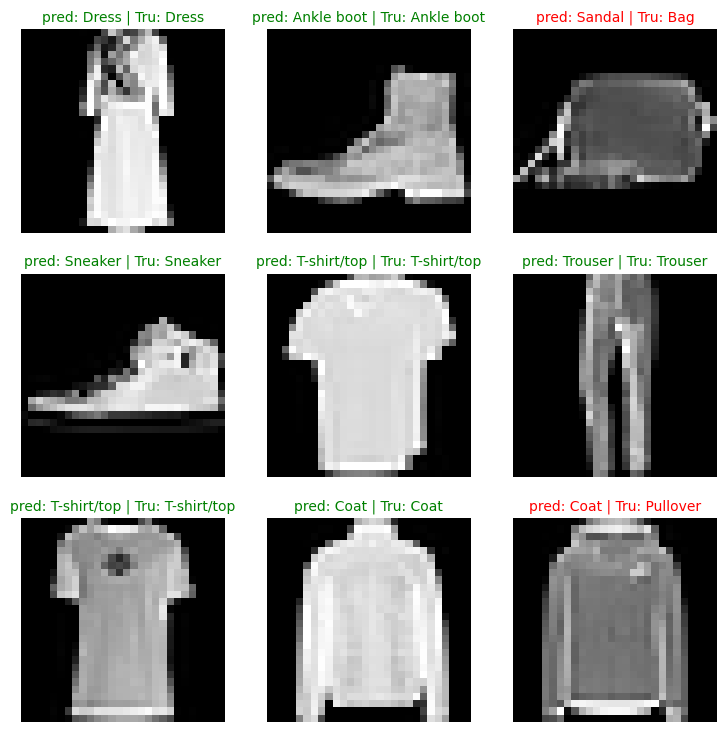

In [ ]:
#plot pedictions
plt.figure(figsize=(9,9))
nrows , ncols = 3 , 3
for i , sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in texxt form , e.g 'sandal')
  pred_label = class_names[pred_classes[i]]

  # Get true label in text form
  true_label = class_names[test_labels[i]]

  # Create a rirle for the plot
  title_text = f"pred: {pred_label} | Tru: {true_label}"

  # Check for equality of pred and true labels and change color of title text
  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False);

### Making confusion matrics

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X , y in tqdm(test_dataloader, desc='Making predictions.........'):
    X , y = X.to(device) , y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions.........:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
! pip install torchmetrics
import torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 12.2 MB/s eta 0:00:00


In [ ]:
! pip install mlxtend

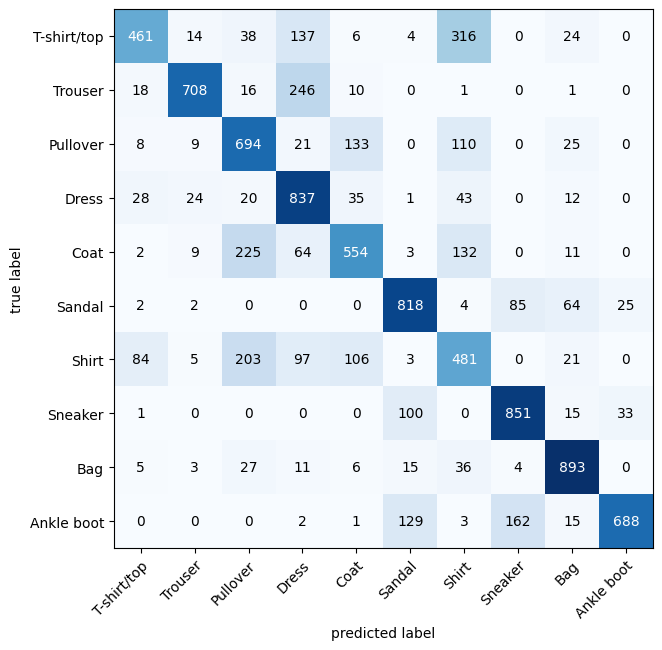

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)

MODEL_NAME = "04_pytorch_cv_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/04_pytorch_cv_model_3.pth
